# Analisando as notas em geral: ler o arquivo ratings.csv e ver as 1as linhas, assim como o tamanho linXcol e renomear as colunas

In [3]:
import pandas as pd

In [5]:
notas = pd.read_csv('../ratings.csv')

In [6]:
notas.shape

(100836, 4)

In [8]:
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

In [11]:
notas.head(20)

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


# Valores únicos, contagem de linhas por valor, média e mediana

In [14]:
sorted(notas.nota.unique())

[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

In [16]:
print("Média", notas.nota.mean(), "Mediana", notas.nota.median())

Média 3.501556983616962 Mediana 3.5


# Histograma a partir de um Pandas Series

<AxesSubplot:>

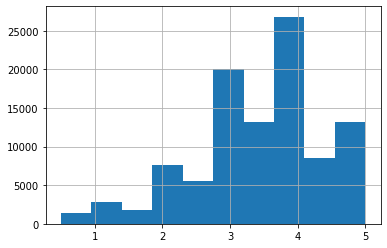

In [17]:
notas.nota.hist()

# Descrição de um Pandas Series

In [18]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

# Boxplot do Seaborn com "data"

In [20]:
import seaborn as sns

<AxesSubplot:>

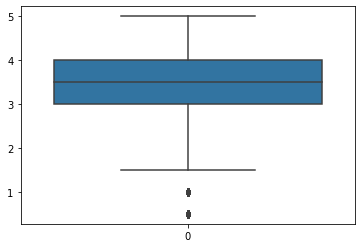

In [21]:
sns.boxplot(data=notas.nota)

# Olhando os filmes (movies.csv), renomear colunas

In [23]:
filmes = pd.read_csv('../movies.csv')

In [24]:
filmes

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


# Analisando algumas notas especificas por filme (query()) por ID de filme

In [29]:
notas.query("filmeId == 1").nota.mean()

3.9209302325581397

# Agrupamento de filmes analisando a média das notas e em um histograma

In [31]:
medias_filmes = notas.groupby(by=["filmeId"]).nota.mean()

<AxesSubplot:ylabel='Frequency'>

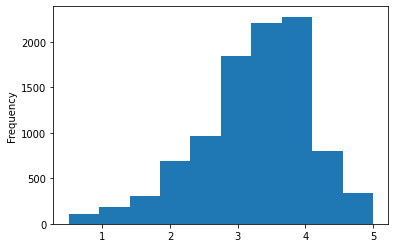

In [32]:
medias_filmes.plot(kind='hist')

# Boxplot do seaborn (y) com as médias por filme

<AxesSubplot:ylabel='nota'>

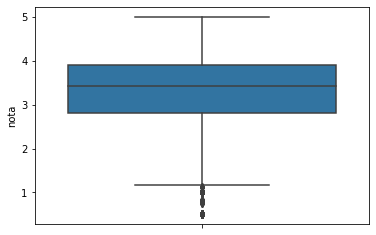

In [33]:
sns.boxplot(y=medias_filmes)

# histplot do Seaborn para as médias por filme

<AxesSubplot:xlabel='nota', ylabel='Count'>

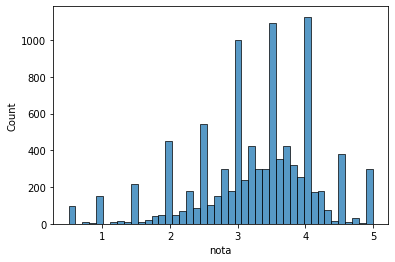

In [34]:
sns.histplot(medias_filmes)

# Dataset TMDB "tmdb_5000_movies.csv"

In [35]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")

In [36]:
tmdb

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

# Idiomas originais (original_language) únicos

In [37]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

# Tipos de variáveis (language, release_date, genres, runtime, vote_average, budget)
### Nominal
### Categórica
### Ordinal
### Contínua

In [ ]:
# budget => orcamento => quantitativa continuo 

In [ ]:
# quantidade de votos => 1, 2, 3, 4, nao tem 2.5 votos.
# notas do movielens => 0.5, 1, 1.5, ... ,5 nao tem 2.7

# Contagem de valores dos idiomas

In [38]:
tmdb.original_language.value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
nl       4
fa       4
he       3
th       3
ro       2
cs       2
ar       2
id       2
ta       2
sl       1
tr       1
el       1
pl       1
hu       1
af       1
is       1
xx       1
te       1
no       1
ky       1
nb       1
vi       1
ps       1
Name: original_language, dtype: int64

# Contagem de idioma: value_counts() >> to_frame() >> reset_index()

In [41]:
filmes_idiomas = tmdb.original_language.value_counts().to_frame().reset_index()
filmes_idiomas.columns = ["idioma", "total"]

# barplot do Seaborn usando x="idioma_original", y="total" e data=contagem_de_idioma

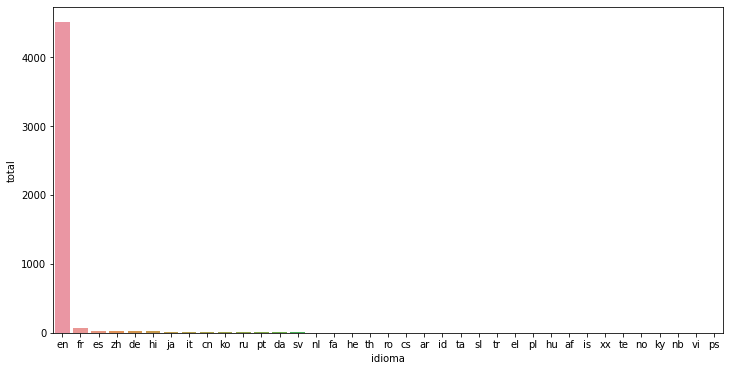

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(x="idioma", y="total", data=filmes_idiomas)

plt.show()

# Qual o total de filmes por idioma? Qual o total do idioma "en"? Qual a diferença?

In [70]:
total_en = filmes_idiomas[filmes_idiomas['idioma'] == 'en'].total.sum() # filmes_idiomas.query("idioma != 'en'")
total_outros = filmes_idiomas[filmes_idiomas['idioma'] != 'en'].total.sum()
# filmes_idiomas.total.sum()
dif = filmes_idiomas.total.sum() - total_en
print(dif, total_outros)
filmes_nao_en = tmdb[tmdb.original_language != 'en']

298 298


# Dicionário com 2 chaves: idioma e total. Valores são 2 listas, [ingles, outros] e os valores [total_ingles, total_resto]
# Transformar o dicionário em DataFrame. 
# Plotar um barplot do Seaborn com x="idioma", y="total" e data=Dicionário

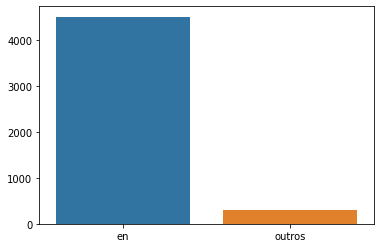

In [61]:
idioma_d = {
    "idioma": ['en', 'outros'],
    "total": [total_en, total_outros]
}
sns.barplot(x='idioma', y='total', data=idioma_d)
plt.show()

# Pie do Matplotlib com chave "total" do dicionário e labels = chave "idioma"

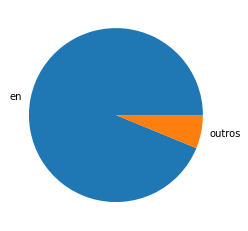

In [63]:
plt.pie(idioma_d['total'], labels=idioma_d['idioma'])
plt.show()

# Filmes com idioma != 'en'. Contagem de valores.
# catplot do Seaborn com x = "original_language", kind='count' e data = filmes que não são ingles

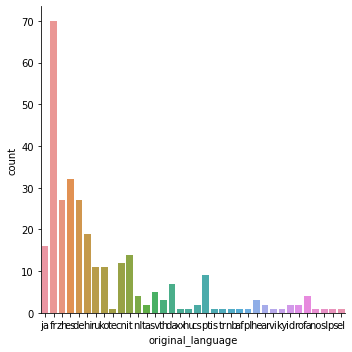

In [69]:
sns.catplot(x='original_language', kind='count', data=filmes_nao_en)

# catplot do Seaborn com aspect=2, palette="GnBu_d" e order = índice do DataFrame (value_counts) com totais de idioma

In [74]:
tmdb.original_language.value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ko', 'ru', 'pt',
       'da', 'sv', 'nl', 'fa', 'he', 'th', 'ro', 'cs', 'ar', 'id', 'ta', 'sl',
       'tr', 'el', 'pl', 'hu', 'af', 'is', 'xx', 'te', 'no', 'ky', 'nb', 'vi',
       'ps'],
      dtype='object')

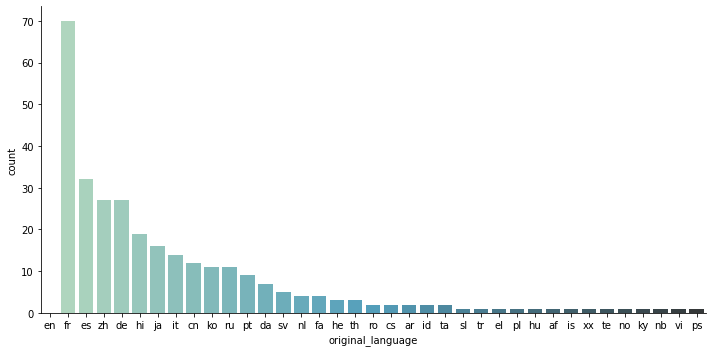

In [75]:
sns.catplot(x='original_language', kind='count', data=filmes_nao_en, aspect=2, palette='GnBu_d', order=tmdb.original_language.value_counts().index)

# Revisando o papel da média, mediana, medidas de tendência central, dispersão, desvio padrão, box plot, histograma
# Qual o problema da média e da mediana?

# boxplot do Seaborn com x = "filmeId", y = "nota" e data = DataFrame de filmes .query("filmeId in [1,2,3,4,5]")